In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

# Ploting The Time Series

In [2]:
train = pd.read_csv('Data.csv', nrows=1000)
train.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.639090e+12,10/12/2021 0:00,BTC/USDT,47535.90,48070.92,47439.29,47899.99,679.55838,32437635.12,21323
1,1.639090e+12,09/12/2021 23:00,BTC/USDT,47945.20,48258.37,47505.00,47545.59,1110.16209,53232959.85,34794
2,1.639090e+12,09/12/2021 22:00,BTC/USDT,47975.50,48468.11,47670.01,47945.20,1374.78005,66081314.15,45394
3,1.639080e+12,09/12/2021 21:00,BTC/USDT,47683.61,48141.18,47563.45,47980.29,1698.29772,81293884.98,45026
4,1.639080e+12,09/12/2021 20:00,BTC/USDT,47615.89,47724.39,47320.00,47683.61,1874.89405,89054446.66,54376


In [3]:
train['close'].isnull().values.any()

False

In [4]:
train['date'].isnull().values.any()

False

In [5]:
data=train['close']
date1=train['date']

In [6]:
train1=train[['date','close']]
train1.head()

,date,close
0,10/12/2021 0:00,47899.99
1,09/12/2021 23:00,47545.59
2,09/12/2021 22:00,47945.20
3,09/12/2021 21:00,47980.29
4,09/12/2021 20:00,47683.61


In [7]:
train2=train1.set_index('date')
train2.head()

,close
date,
10/12/2021 0:00,47899.99
09/12/2021 23:00,47545.59
09/12/2021 22:00,47945.20
09/12/2021 21:00,47980.29
09/12/2021 20:00,47683.61


In [8]:
# train2.sort_index(inplace=True) 
train2.head()

,close
date,
10/12/2021 0:00,47899.99
09/12/2021 23:00,47545.59
09/12/2021 22:00,47945.20
09/12/2021 21:00,47980.29
09/12/2021 20:00,47683.61


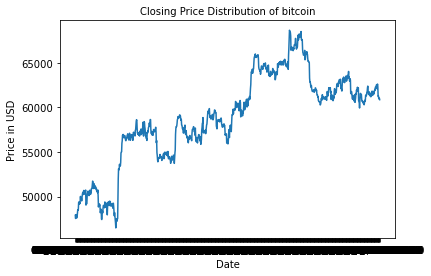

In [9]:
plt.plot(train2)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price in USD', fontsize=10)
plt.title("Closing Price Distribution of bitcoin", fontsize=10)
plt.show()

## Testing the stationary

In [10]:
from statsmodels.tsa.stattools import adfuller

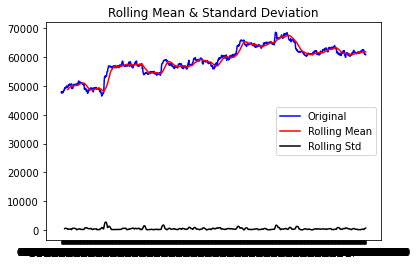

ADF Staistics: -2.217715776760372
p-value: 0.19987859513408862
The graph is non stationary
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [11]:
def test_stationary(x):
    #Determining rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics
    orig = plt.plot(x, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test
    result=adfuller(x)
    print(f'ADF Staistics: {result[0]}')
    print(f'p-value: {result[1]}')
    pvalue=result[1]
    for key,values in result[4].items():
        if result[0]>values:
            print("The graph is non stationary")
            break
        else:
            print("The graph is stationary")
            break
    print('Critical values:')
    for key,values in result[4].items():
        print('\t%s: %.3f' % (key,values))

ts=train2['close']
test_stationary(ts)

## Log transforming the series

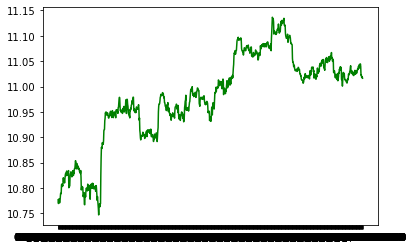

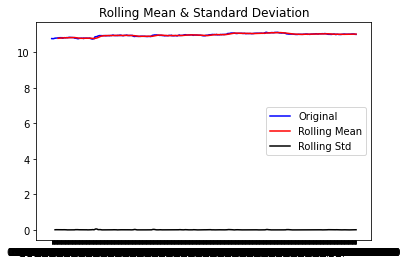

ADF Staistics: -2.335031600379502
p-value: 0.1609183176864562
The graph is non stationary
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [12]:
ts_log = np.log(ts)
plt.plot(ts_log,color='green')
plt.show()

test_stationary(ts_log)

## Remove trend and seasonality with differencing

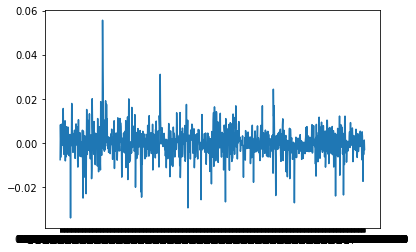

In [13]:
ts_log_diff = ts_log-ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

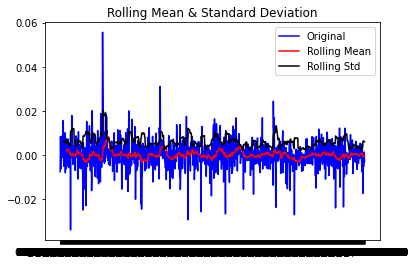

ADF Staistics: -29.477547001665737
p-value: 0.0
The graph is stationary
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [14]:
ts_log_diff.dropna(inplace=True)
test_stationary(ts_log_diff)

## Auto Regressive Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

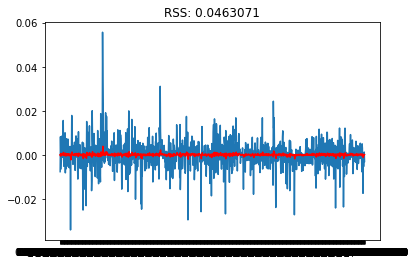

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(1,1,0))
results_AR=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()

## Moving Average Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

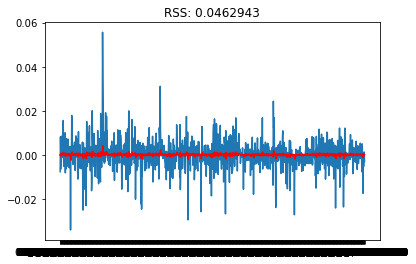

In [16]:
model = ARIMA(ts_log, order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show()

## Autoregressive Integrated Moving Average Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

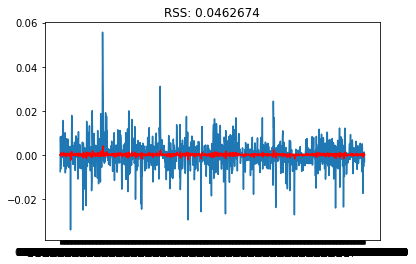

In [17]:
model = ARIMA(ts_log, order=(2,1,0))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

## Test and train the model

Printing Predicted vs Expected Values...


predicted = 63432.381168,   original = 62998.320000,   error = 0.689004  %
predicted = 62984.245483,   original = 62913.300000,   error = 0.112767  %
predicted = 62932.875686,   original = 63198.930000,   error = 0.420979  %
predicted = 63241.547508,   original = 63050.620000,   error = 0.302816  %
predicted = 63050.906084,   original = 61565.340000,   error = 2.412991  %
predicted = 61467.869653,   original = 61521.130000,   error = 0.086572  %
predicted = 61569.161333,   original = 61769.710000,   error = 0.324672  %
predicted = 61807.022712,   original = 61754.240000,   error = 0.085472  %
predicted = 61762.876024,   original = 61412.010000,   error = 0.571331  %
predicted = 61401.181346,   original = 61074.500000,   error = 0.534890  %
predicted = 61071.912304,   original = 60909.420000,   error = 0.266777  %
predicted = 60920.093244,   original = 61320.000000,   error = 0.652164  %
predicted = 61373.197550,   original = 60943.920000,   er

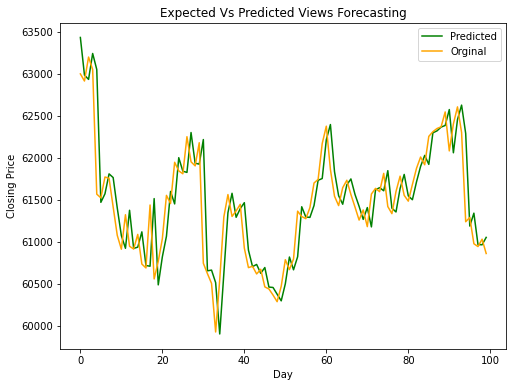

In [21]:
size = int(len(ts_log)-100)

#Devide into test and train
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]

history=[x for x in train_arima]
predictions=list()
originals=list()
error_list=list()

print('Printing Predicted vs Expected Values...')
print('\n')

# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   original = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()